https://s3.amazonaws.com/dl.ncsbe.gov/ENRS/2024_11_05/results_pct_20241105.zip

In [17]:
import pandas as pd

from us_election_2024.helpers import read_data, unique, filter_for, total_votes_per_precinct, filter_isin, filter_multiindex_by_tuples

In [18]:
df = read_data()
df = df.set_index(["County", "Precinct", "Choice"])
df

Election Date  Contest Group ID  \
County   Precinct Choice                                                
CALDWELL 1        Richard S. Holloway    11/05/2024              1155   
                  Kim Bost               11/05/2024              1347   
                  Jill Stein             11/05/2024              1393   
         10       Michael Barrick        11/05/2024                 2   
                  David Bruner           11/05/2024                 4   
...                                             ...               ...   
WILKES   104      Jeff Jackson           11/05/2024              1005   
                  Chad Brown             11/05/2024              1302   
                  Darren Staley          11/05/2024              1338   
                  Eddie Settle           11/05/2024              1338   
                  Brad Briner            11/05/2024              1378   

                                      Contest Type  \
County   Precinct Choice                             
CALDWELL 1        Richard S. Holloway            S   
                  Kim Bost                       S   
                  Jill Stein                     S   
         10       Michael Barrick                C   
                  David Bruner                   C   
...                                            ...   
WILKES   104      Jeff Jackson                   S   
                  Chad Brown                     S   
                  Darren Staley                  S   
                  Eddie Settle                   S   
                  Brad Briner                    S   

                                                                            Contest Name  \
County   Precinct Choice                                                                   
CALDWELL 1        Richard S. Holloway        NC DISTRICT COURT JUDGE DISTRICT 36 SEAT 09   
                  Kim Bost                                   NC STATE SENATE DISTRICT 45   
                  Jill Stein                                                US PRESIDENT   
         10       Michael Barrick                     CALDWELL COUNTY BOARD OF EDUCATION   
                  David Bruner         CALDWELL SOIL AND WATER CONSERVATION DISTRICT ...   
...                                                                                  ...   
WILKES   104      Jeff Jackson                                       NC ATTORNEY GENERAL   
                  Chad Brown                                       NC SECRETARY OF STATE   
                  Darren Staley                              NC STATE SENATE DISTRICT 36   
                  Eddie Settle                               NC STATE SENATE DISTRICT 36   
                  Brad Briner                                               NC TREASURER   

                                      Choice Party  Vote For  Election Day  \
County   Precinct Choice                                                     
CALDWELL 1        Richard S. Holloway          REP         1           580   
                  Kim Bost                     DEM         1           173   
                  Jill Stein                   GRE         1             0   
         10       Michael Barrick              LIB         3           102   
                  David Bruner                             1           158   
...                                            ...       ...           ...   
WILKES   104      Jeff Jackson                 DEM         1            82   
                  Chad Brown                   REP         1           260   
                  Darren Staley                DEM         1            85   
                  Eddie Settle                 REP         1           270   
                  Brad Briner                  REP         1           280   

                                       Early Voting  Absentee by Mail  \
County   Precinct Choice                                                
CALDWELL 1        Richard S

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 230492 entries, ('CALDWELL', '1', 'Richard S. Holloway') to ('WILKES', '104', 'Brad Briner')
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Election Date     230492 non-null  object 
 1   Contest Group ID  230492 non-null  int64  
 2   Contest Type      230492 non-null  object 
 3   Contest Name      230492 non-null  object 
 4   Choice Party      198337 non-null  object 
 5   Vote For          230492 non-null  int64  
 6   Election Day      230492 non-null  int64  
 7   Early Voting      230492 non-null  int64  
 8   Absentee by Mail  230492 non-null  int64  
 9   Provisional       230492 non-null  int64  
 10  Total Votes       230492 non-null  int64  
 11  Real Precinct     230492 non-null  object 
 12  Unnamed: 15       0 non-null       float64
dtypes: float64(1), int64(7), object(5)
memory usage: 24.1+ MB


In [20]:
house_races = unique(df, "Contest Name", "US HOUSE")
house_races

['US HOUSE OF REPRESENTATIVES DISTRICT 07',
 'US HOUSE OF REPRESENTATIVES DISTRICT 06',
 'US HOUSE OF REPRESENTATIVES DISTRICT 08',
 'US HOUSE OF REPRESENTATIVES DISTRICT 09',
 'US HOUSE OF REPRESENTATIVES DISTRICT 14',
 'US HOUSE OF REPRESENTATIVES DISTRICT 11',
 'US HOUSE OF REPRESENTATIVES DISTRICT 03',
 'US HOUSE OF REPRESENTATIVES DISTRICT 04',
 'US HOUSE OF REPRESENTATIVES DISTRICT 01',
 'US HOUSE OF REPRESENTATIVES DISTRICT 10',
 'US HOUSE OF REPRESENTATIVES DISTRICT 05',
 'US HOUSE OF REPRESENTATIVES DISTRICT 13',
 'US HOUSE OF REPRESENTATIVES DISTRICT 12',
 'US HOUSE OF REPRESENTATIVES DISTRICT 02']

In [21]:
df_district = filter_for(df, "Contest Name", "US HOUSE OF REPRESENTATIVES DISTRICT 01")
df_district

Election Date  Contest Group ID  \
County    Precinct Choice                                            
EDGECOMBE 0101     Laurie Buckhout    11/05/2024              1379   
                   Don Davis          11/05/2024              1379   
          0501     Laurie Buckhout    11/05/2024              1379   
          0601     Don Davis          11/05/2024              1379   
          0801     Laurie Buckhout    11/05/2024              1379   
...                                          ...               ...   
WILSON    PRWK     Don Davis          11/05/2024              1379   
          PRTO     Laurie Buckhout    11/05/2024              1379   
          PRWC     Laurie Buckhout    11/05/2024              1379   
WARREN    008      Don Davis          11/05/2024              1379   
WAYNE     04       Laurie Buckhout    11/05/2024              1379   

                                   Contest Type  \
County    Precinct Choice                         
EDGECOMBE 0101     Laurie Buckhout            S   
                   Don Davis                  S   
          0501     Laurie Buckhout            S   
          0601     Don Davis                  S   
          0801     Laurie Buckhout            S   
...                                         ...   
WILSON    PRWK     Don Davis                  S   
          PRTO     Laurie Buckhout            S   
          PRWC     Laurie Buckhout            S   
WARREN    008      Don Davis                  S   
WAYNE     04       Laurie Buckhout            S   

                                                               Contest Name  \
County    Precinct Choice                                                     
EDGECOMBE 0101     Laurie Buckhout  US HOUSE OF REPRESENTATIVES DISTRICT 01   
                   Don Davis        US HOUSE OF REPRESENTATIVES DISTRICT 01   
          0501     Laurie Buckhout  US HOUSE OF REPRESENTATIVES DISTRICT 01   
          0601     Don Davis        US HOUSE OF REPRESENTATIVES DISTRICT 01   
          0801     Laurie Buckhout  US HOUSE OF REPRESENTATIVES DISTRICT 01   
...                                                                     ...   
WILSON    PRWK     Don Davis        US HOUSE OF REPRESENTATIVES DISTRICT 01   
          PRTO     Laurie Buckhout  US HOUSE OF REPRESENTATIVES DISTRICT 01   
          PRWC     Laurie Buckhout  US HOUSE OF REPRESENTATIVES DISTRICT 01   
WARREN    008      Don Davis        US HOUSE OF REPRESENTATIVES DISTRICT 01   
WAYNE     04       Laurie Buckhout  US HOUSE OF REPRESENTATIVES DISTRICT 01   

                                   Choice Party  Vote For  Election Day  \
County    Precinct Choice                                                 
EDGECOMBE 0101     Laurie Buckhout          REP         1            26   
                   Don Davis                DEM         1           222   
          0501     Laurie Buckhout          REP         1            75   
          0601     Don Davis                DEM         1           153   
          0801     Laurie Buckhout          REP         1           162   
...                                         ...       ...           ...   
WILSON    PRWK     Don Davis                DEM         1            99   
          PRTO     Laurie Buckhout          REP         1           298   
          PRWC     Laurie Buckhout          REP         1            24   
WARREN    008      Don Davis                DEM         1           197   
WAYNE     04       Laurie Buckhout          REP         1           408   

                                    Early Voting  Absentee by Mail  \
County    Precinct Choice                                            
EDGECOMBE 0101     Laurie Buckhout             0                 0   
                   Don Davis                   0                 0   
          0501     Laurie Buckhout             0                 0   
          0601     Don Davis                   0                 0   
          0801     Laurie Buckhout  

In [32]:
df_district.iloc[["EDGECOMB", "501"]]

ValueError: invalid literal for int() with base 10: np.str_('EDGECOMB')

In [22]:
# df_pres = df[df.Precinct.isin(district_precincts) & (df["Contest Name"] == "US PRESIDENT")]
df_pres = filter_multiindex_by_tuples(df, df_district.index)# filter_isin(df[df_district.index], "Precinct", district_precincts)
df_pres = filter_for(df_pres, "Contest Name", "US PRESIDENT")
df_pres

,,,Election Date,Contest Group ID,Contest Type,Contest Name,Choice Party,Vote For,Election Day,Early Voting,Absentee by Mail,Provisional,Total Votes,Real Precinct,Unnamed: 15
County,Precinct,Choice,,,,,,,,,,,,,


In [23]:
total_house = total_votes_per_precinct(df_district)
total_house

,Early Voting,Total Votes
Precinct,,
001,598,928
002,515,742
003,443,706
004,387,592
005,614,879
...,...,...
WM1,0,397
WM2,0,437
WN,661,856


In [24]:
total_pres = total_votes_per_precinct(df_pres)
total_pres

,Early Voting,Total Votes
Precinct,,


In [25]:
df_gov = filter_multiindex_by_tuples(df, df_district.index)
df_gov = filter_for(df_gov, "Contest Name", "NC GOVERNOR")
df_gov

,,,Election Date,Contest Group ID,Contest Type,Contest Name,Choice Party,Vote For,Election Day,Early Voting,Absentee by Mail,Provisional,Total Votes,Real Precinct,Unnamed: 15
County,Precinct,Choice,,,,,,,,,,,,,


In [26]:
total_gov = total_votes_per_precinct(df_gov)
total_gov

,Early Voting,Total Votes
Precinct,,


In [27]:
total = pd.merge(total_pres["Total Votes"], total_gov["Total Votes"], on="Precinct")
total

,Total Votes_x,Total Votes_y
Precinct,,


In [28]:
total = pd.merge(total, total_house["Total Votes"], on="Precinct")
total.columns = ["US PRESIDENT", "NC GOVERNOR", "HOUSE"]
total

,US PRESIDENT,NC GOVERNOR,HOUSE
Precinct,,,


In [29]:
total["DIFFERENCE"] = total["US PRESIDENT"] - total["HOUSE"]
total["PERCENTAGE"] = total.DIFFERENCE / total["US PRESIDENT"] * 100
total

,US PRESIDENT,NC GOVERNOR,HOUSE,DIFFERENCE,PERCENTAGE
Precinct,,,,,


IndexError: index 0 is out of bounds for axis 0 with size 0

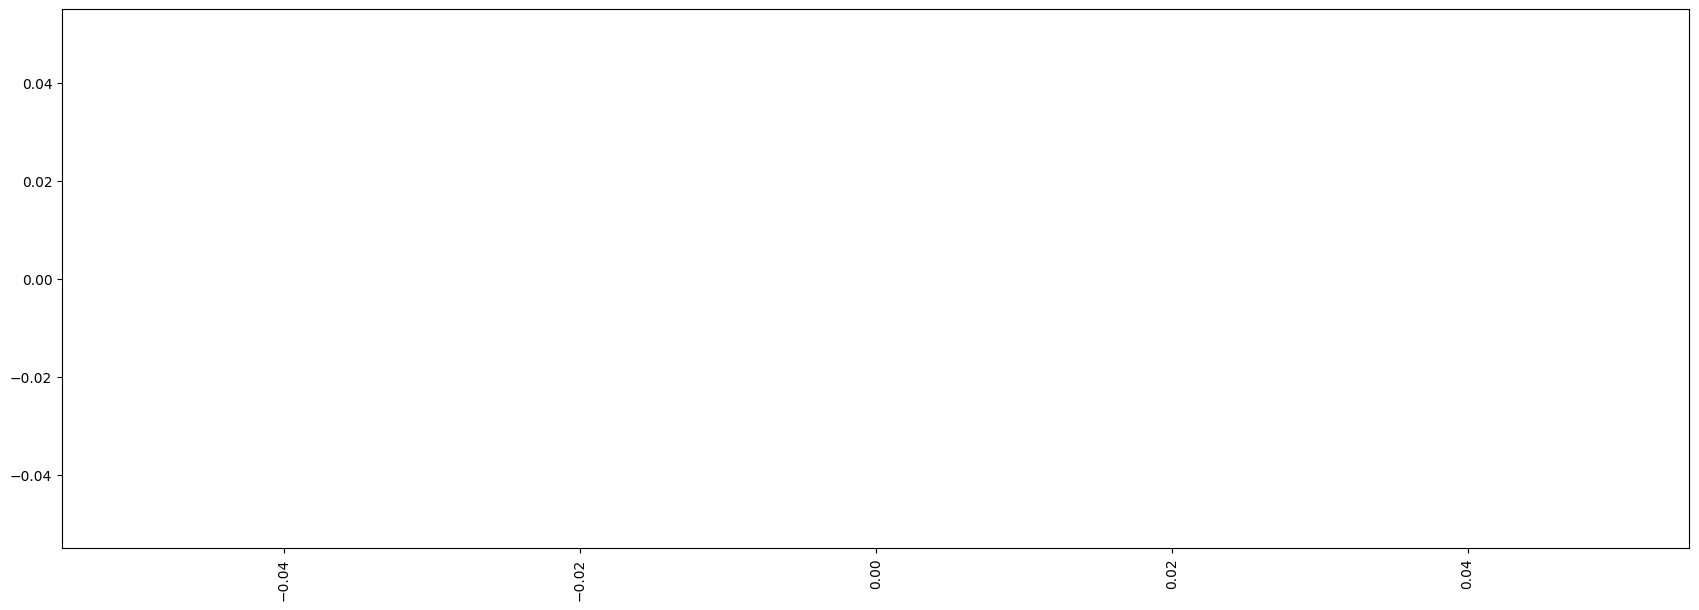

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(21,7))
total.PERCENTAGE.sort_values().plot.bar()

In [45]:
total.sort_values("PERCENTAGE")[-20:]

,US PRESIDENT,NC GOVERNOR,HOUSE,DIFFERENCE,PERCENTAGE
Precinct,,,,,
09,21694,21244,2020,19674,90.688670
01,20463,20093,1747,18716,91.462640
27,13250,12995,1056,12194,92.030189
009,5114,5035,406,4708,92.061009
16,19943,19553,1581,18362,92.072406
18,9365,9209,738,8627,92.119594
BR,4085,3985,282,3803,93.096695
23,17822,17482,1206,16616,93.233083
10,14940,14651,999,13941,93.313253


In [46]:
df_pres[df_pres.Precinct=="1"]

,County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,Early Voting,Absentee by Mail,Provisional,Total Votes,Real Precinct,Unnamed: 15
2,CALDWELL,11/05/2024,1,1393,S,US PRESIDENT,Jill Stein,GRE,1,0,0,0,0,0,Y,NaN
3506,TYRRELL,11/05/2024,1,1393,S,US PRESIDENT,Kamala D. Harris,DEM,1,74,0,0,0,74,Y,NaN
33903,CHOWAN,11/05/2024,1,1393,S,US PRESIDENT,Jill Stein,GRE,1,1,0,0,0,1,Y,NaN
42392,GATES,11/05/2024,1,1393,S,US PRESIDENT,Donald J. Trump,REP,1,159,358,15,3,535,Y,NaN
44277,TYRRELL,11/05/2024,1,1393,S,US PRESIDENT,Jill Stein,GRE,1,0,0,0,0,0,Y,NaN
50369,CHOWAN,11/05/2024,1,1393,S,US PRESIDENT,Chase Oliver,LIB,1,2,3,0,0,5,Y,NaN
62403,CHOWAN,11/05/2024,1,1393,S,US PRESIDENT,Cornel West,JFA,1,0,1,0,0,1,Y,NaN
66330,CHOWAN,11/05/2024,1,1393,S,US PRESIDENT,Kamala D. Harris,DEM,1,124,628,33,7,792,Y,NaN
67156,GATES,11/05/2024,1,1393,S,US PRESIDENT,Chase Oliver,LIB,1,3,2,0,0,5,Y,NaN
67157,GATES,11/05/2024,1,1393,S,US PRESIDENT,Cornel West,JFA,1,0,1,0,0,1,Y,NaN


In [47]:
df_pres[df_pres.County=="CHOWAN"]

,County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,Early Voting,Absentee by Mail,Provisional,Total Votes,Real Precinct,Unnamed: 15
8483,CHOWAN,11/05/2024,2,1393,S,US PRESIDENT,Chase Oliver,LIB,1,1,7,2,0,10,Y,NaN
8484,CHOWAN,11/05/2024,2,1393,S,US PRESIDENT,Randall Terry,CST,1,2,2,0,0,4,Y,NaN
8491,CHOWAN,11/05/2024,5,1393,S,US PRESIDENT,Kamala D. Harris,DEM,1,54,87,0,0,141,Y,NaN
16759,CHOWAN,11/05/2024,3,1393,S,US PRESIDENT,Randall Terry,CST,1,2,1,1,0,4,Y,NaN
33771,CHOWAN,11/05/2024,5,1393,S,US PRESIDENT,Cornel West,JFA,1,0,0,0,0,0,Y,NaN
33903,CHOWAN,11/05/2024,1,1393,S,US PRESIDENT,Jill Stein,GRE,1,1,0,0,0,1,Y,NaN
33907,CHOWAN,11/05/2024,2,1393,S,US PRESIDENT,Cornel West,JFA,1,2,1,0,0,3,Y,NaN
33919,CHOWAN,11/05/2024,6,1393,S,US PRESIDENT,Write-In (Miscellaneous),NaN,1,2,3,0,0,5,Y,NaN
34059,CHOWAN,11/05/2024,2,1393,S,US PRESIDENT,Jill Stein,GRE,1,2,1,0,0,3,Y,NaN
37948,CHOWAN,11/05/2024,3,1393,S,US PRESIDENT,Chase Oliver,LIB,1,0,1,0,0,1,Y,NaN


In [34]:
test = pd.DataFrame({"a": [1, 2, 3, 4, 5, 6], "b": [0, 1, 0, 1, 0, 1], "c": [1, 2, 3, 1, 2, 3]})
test

,a,b,c
0,1,0,1
1,2,1,2
2,3,0,3
3,4,1,1
4,5,0,2
5,6,1,3


In [39]:
test.set_index("b").iloc[5]

a    6
c    3
Name: 1, dtype: int64